In [1]:
from Swimmer import *
import numpy as np
import datetime 

## Initialization

In [2]:
T=1
R=1
a = 10*R
epsilons = np.linspace(0.1,5,50)*R

steps = 1000
nsteps = 1000
dt = T/steps

r0 = np.array([[0, 0, 0],
[0, 0, a],
[a*np.sqrt(8)/3, 0 , -a/3],
[-a*np.sqrt(8)/6, a*np.sqrt(24)/6 , -a/3],
[-a*np.sqrt(8)/6, -a*np.sqrt(24)/6, -a/3]])


epsilon = 7
w = epsilon/T
closing  = a - np.arange(steps+1)*epsilon/steps
opening = a - epsilon + np.arange(steps+1)*epsilon/steps
opened = a *np.ones(steps+1)
closed = (a-epsilon)*np.ones(steps+1)

In [3]:
name = "test"
f = open(f"{name}.txt", "a")
f.write(rf2)
f.close()

NameError: name 'rf2' is not defined

In [ ]:
rf2.tostring().__doc__

NameError: name 'rf2' is not defined

In [4]:
def saveCoordination(r,name): 
    text  = """#version 3.7; 
    global_settings { assumed_gamma 1.0 }
    

    camera {
    location  <20, 20, 20>
    right     x*image_width/image_height
    look_at   <0, 0, 0>
    angle 58
    }

    background { color rgb<1,1,1>*0.03 }


    light_source { <-20, 30, -25> color red 0.6 green 0.6 blue 0.6 }
    light_source { < 20, 30, -25> color red 0.6 green 0.6 blue 0.6 }
    
    #declare m = 1;
    union {

    union {
    sphere { m*<""" + str(r[0,0])+ ","+ str(r[0,1])+"," +str(r[0,2])+""">, 1 }        
    sphere {  m*<"""+str(r[1,0])+","+ str(r[1,1])+"," +str(r[1,2])+""">, 1 }
    sphere {  m*<"""+str(r[2,0])+","+ str(+r[2,1])+"," +str(r[2,2])+""">, 1 }
    sphere {  m*<""" +str(r[3,0])+","+ str(r[3,1])+"," +str(r[3,2])+""">, 1}
    sphere { m*<"""+str(r[4,0])+"," +str(r[4,1])+"," +str(r[4,2])+""">, 1 }    

        pigment { color rgb<0.8,0,0>  }
    finish { ambient 0.1 diffuse 0.7 phong 1 }
    }    
    union {
    cylinder { m*<"""+str(r[1,0])+"," +str(r[1,1])+","+ str(r[1,2])+">, <"+str(r[0,0])+","+ str(r[0,1])+"," +str(r[0,2])+""">, 0.5 }
    cylinder { m*<"""+str(r[2,0])+"," +str(r[2,1])+"," +str(r[2,2])+">, <"+str(r[0,0])+"," +str(r[0,1])+","+ str(r[0,2])+""">, 0.5}
    cylinder { m*<"""+str(r[3,0])+"," +str(r[3,1])+"," +str(r[3,2])+">, <"+str(r[0,0])+"," +str(r[0,1])+"," +str(r[0,2])+""">, 0.5 }
    cylinder {  m*<""" +str(r[4,0])+"," +str(r[4,1])+","+str(r[4,2])+">, <"+str(r[0,0])+","+str(r[0,1])+","+str(r[0,2])+""">, 0.5}

    pigment { color rgb<0.6,.2,.2>  }
    finish { ambient 0.1 diffuse 0.7 phong 1 }    
    }
    
    // rotate <0, 0, 0>
    }
    """
    f = open(f"./pov/{name}.pov", "a")
    f.write(text)
    f.close()

In [5]:
saveCoordination(rf2,"coor")

NameError: name 'rf2' is not defined

In [6]:
qounter = np.array([0])
np.save("q",qounter)
q = np.load("q.npy")
str(q[0])

'0'

'0'

In [7]:
@njit
def mul(a,b):
    ans = np.zeros((5,5,3,3))
    for i in range(5):
        for j in range(5):
            ans[i,j] = a @ b[i,j]
    return ans

def visualize(r,angles=(0,0)):
    ax = plt.figure().add_subplot(projection='3d')
    colors = ('r', 'g', 'b', 'k','y')
    ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)
    
    for j in range(0,5):
        ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
    
    ax.view_init(angles[0],angles[1])
    return ax


def getAngle(a,b):
    return (180/np.pi)*np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))



@njit
def getDistanceMatrix(A):   # dij = rj - ri
    tiledPoses = tile(A)
    distances = tiledPoses - tiledPoses.transpose((1,0,2))
    return distances



@njit
def tile(x):
    tiled = np.zeros((5,5,3))
    for i in range(5):
        tiled[i,:,:] = x
        
    return tiled


def getR0(ls):
    a1,a2,a3,a4 = ls
    
    R0 = [[0, 0, 0],
    [0, 0, a1],
    [a2*np.sqrt(8)/3, 0 , -a2/3],
    [-a3*np.sqrt(8)/6, a3*np.sqrt(24)/6 , -a3/3],
    [-a4*np.sqrt(8)/6, -a4*np.sqrt(24)/6, -a4/3]]
    
    return np.array(R0)




@njit
def tile2(x):
    tiled = np.zeros((5,5,3,3))
    for i in range(3):
        for j in range(3):
            tiled[:,:,i,j] = x
        
    return tiled


@njit
def getO(d,R):
    d2 = d**2    
    drNorm = np.sum(d2,axis=2)**0.5
            
    
    I5_5_3_3 = np.zeros((5,5,3,3))

    for i in range(5):
        for j in range(5):
            I5_5_3_3[i,j,:,:] = np.eye(3)


    c1 = d.reshape(5,5,3,1)
    c2 = c1.transpose(0,1,3,2)    
    B = np.multiply(c1,c2)    
    c3 = tile2(drNorm)

    O = R*(I5_5_3_3 + B/(c3**2))*0.75/c3 #*R/norm(l)

    for i in range(5):  #for i=j
        O[i,i,:,:] = np.eye(3)
        
    return mul(etas,O)

@njit
def getRR(r):
    rr0 = np.array([
    
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]])
    
    
    rr1 = np.array([[0, -r[0,2] , r[0,1],  0, -r[1,2] , r[1,1],    0, -r[2,2] , r[2,1], 0, -r[3,2] , r[3,1]   ,0, -r[4,2] , r[4,1]],
    [r[0,2], 0 , -r[0,0],   r[1,2], 0 , -r[1,0],  r[2,2], 0 , -r[2,0],  r[3,2], 0 , -r[3,0],  r[4,2], 0 , -r[4,0]],
    [-r[0,1], r[0,0], 0 , -r[1,1], r[1,0], 0 , -r[2,1], r[2,0], 0 ,   -r[3,1], r[3,0], 0 ,  -r[4,1], r[4,0], 0 ]])
    
    


    
    return np.concatenate((rr0,rr1),axis=0)


@njit
def getOO(d):
    ##Check
    k2_3 = np.dot(d[1,0],d[1,0])*np.dot(d[2,0],d[2,0])/np.dot(d[1,0],d[2,0])
    k2_4 = np.dot(d[1,0],d[1,0])*np.dot(d[3,0],d[3,0])/np.dot(d[1,0],d[3,0])
    k2_5 = np.dot(d[1,0],d[1,0])*np.dot(d[4,0],d[4,0])/np.dot(d[1,0],d[4,0])
    k3_4 = np.dot(d[2,0],d[2,0])*np.dot(d[3,0],d[3,0])/np.dot(d[2,0],d[3,0])
    k3_5 = np.dot(d[2,0],d[2,0])*np.dot(d[4,0],d[4,0])/np.dot(d[2,0],d[4,0])

    p2_3 = np.dot(d[2,0],d[2,0])*d[0,1] - k2_3*d[0,2] 
    p2_4 = np.dot(d[3,0],d[3,0])*d[0,1] - k2_4*d[0,3] 
    p2_5 = np.dot(d[4,0],d[4,0])*d[0,1] - k2_5*d[0,4] 
    p3_4 = np.dot(d[3,0],d[3,0])*d[0,2] - k3_4*d[0,3] 
    p3_5 = np.dot(d[4,0],d[4,0])*d[0,2] - k3_5*d[0,4] 


    q2_3 = np.dot(d[1,0],d[1,0])*d[0,2] - k2_3*d[0,1] 
    q2_4 = np.dot(d[1,0],d[1,0])*d[0,3] - k2_4*d[0,1] 
    q2_5 = np.dot(d[1,0],d[1,0])*d[0,4] - k2_5*d[0,1] 
    q3_4 = np.dot(d[2,0],d[2,0])*d[0,3] - k3_4*d[0,2] 
    q3_5 = np.dot(d[2,0],d[2,0])*d[0,4] - k3_5*d[0,2] 
    
    
    OO = np.array([
        [d[1,0,0], d[1,0,1], d[1,0,2], -d[1,0,0], -d[1,0,1], -d[1,0,2], 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [d[2,0,0], d[2,0,1], d[2,0,2], 0, 0, 0, -d[2,0,0], -d[2,0,1], -d[2,0,2], 0, 0, 0, 0, 0, 0,   ],   
    [d[3,0,0], d[3,0,1], d[3,0,2], 0, 0, 0, 0, 0, 0, -d[3,0,0], -d[3,0,1], -d[3,0,2], 0, 0, 0],
    [d[4,0,0], d[4,0,1], d[4,0,2], 0, 0, 0, 0, 0, 0, 0, 0, 0, -d[4,0,0], -d[4,0,1], -d[4,0,2]],
    
    [-p2_3[0] -q2_3[0], -p2_3[1] -q2_3[1], -p2_3[2] -q2_3[2],                p2_3[0], p2_3[1], p2_3[2], q2_3[0], q2_3[1], q2_3[2], 0, 0, 0, 0, 0, 0], #2_3,
    [-p2_4[0] -q2_4[0], -p2_4[1] -q2_4[1], -p2_4[2] -q2_4[2],                p2_4[0], p2_4[1], p2_4[2], 0, 0, 0, q2_4[0], q2_4[1], q2_4[2], 0, 0, 0],  #2_4,
    [-p2_5[0] -q2_5[0], -p2_5[1] -q2_5[1], -p2_5[2] -q2_5[2],                p2_5[0], p2_5[1], p2_5[2], 0, 0, 0, 0, 0, 0, q2_5[0], q2_5[1], q2_5[2]], #2_5
    [-p3_4[0] -q3_4[0], -p3_4[1] -q3_4[1], -p3_4[2] -q3_4[2],                0, 0, 0, p3_4[0], p3_4[1], p3_4[2], q3_4[0], q3_4[1], q3_4[2], 0, 0, 0],  #3_4
    [-p3_5[0] -q3_5[0], -p3_5[1] -q3_5[1], -p3_5[2] -q3_5[2],                0, 0, 0, p3_5[0], p3_5[1], p3_5[2], 0, 0, 0, q3_5[0], q3_5[1], q3_5[2]] #3_5
    
    ])
    
    return OO




@njit
def getC(l,u):
    lu = np.zeros(4)
    for i in range(4):
        lu[i]= (l[i]*u[i])
        
    
    return np.array([*list(lu), 0,0,0,0,0,0,0,0, 0,0,0])  

#  u -> u/steps maybe



def getV(r,l,u,R):
    d = getDistanceMatrix(r)

    O = getO(d,R)
    newO = np.zeros((15,15))
    for i in range(5):
        for j in range(5):
            newO[3*i:3*i+3,3*j:3*j+3] = O[i,j]
        
    rr= getRR(r)
    mm = np.linalg.inv(newO)


    NN = np.matmul(rr,mm)
    OO = getOO(d)
    AA = np.concatenate((OO,NN),axis=0)
    
    
    

    BB = getC(l,u)
    
    return np.linalg.solve(AA,BB)
        
     
        
def step(r,L,R):
    for t in range(1000):
        try:
            U = L[:,t+1]-L[:,t]
        except IndexError:
            U = L[:,t]-L[:,t-1]
            
        v = getV(r,L[:,t],U,R).reshape((5,3))
        
        r += v  ##########

        
        q = np.load("q.npy")
        
        saveCoordination((ro @ r.T).T  + totalDelta,str(q[0]))

        q +=1

        np.save("q",q)

        
        
    return r  



def act(L,R):
    r = getR0(L[:,0])
    r_final = step(r.copy(),L,R)
    delta = list(r_final - r)[0]
    
    return r_final,delta,np.matmul(getE(r_final), np.linalg.inv(getE(r)))


def getE(r):
    e1 = ((r[1]-r[0])/np.linalg.norm((r[1]-r[0]))).reshape((3,1))
    e2 = ((r[2]-r[0])/np.linalg.norm((r[2]-r[0]))).reshape((3,1))
    e3 = ((r[3]-r[0])/np.linalg.norm((r[3]-r[0]))).reshape((3,1))
    
    return np.concatenate((e1,e2,e3),axis=1)





In [8]:
ro = np.eye(3)
totalDelta = np.zeros(3)

rf1,delta1,ro1 =  act(np.array([closing,opened,opened,opened]),R)
totalDelta += np.matmul(ro,delta1)
ro  = np.matmul(ro1,ro)

# print(np.linalg.norm(getDistanceMatrix(rf2),axis=2))

rf2,delta2,ro2 =  act(np.array([closed,closing,opened,opened]),R)
totalDelta += np.matmul(ro,delta2)
ro  = np.matmul(ro2,ro)
# print(np.linalg.norm(getDistanceMatrix(rf2),axis=2))


rf3,delta3,ro3=  act(np.array([closed,closed,closing,opened]),R)
totalDelta += np.matmul(ro,delta3)
ro  = np.matmul(ro3,ro)
# print(np.linalg.norm(getDistanceMatrix(rf3),axis=2))


rf4,delta4,ro4=  act(np.array([closed,closed,closed,closing]),R)
totalDelta += np.matmul(ro,delta4)
ro  = np.matmul(ro4,ro)

rf5,delta5,ro5=  act(np.array([opening,closed,closed,closed]),R)
totalDelta += np.matmul(ro,delta5)
ro  = np.matmul(ro5,ro)
# print(np.linalg.norm(getDistanceMatrix(rf4),axis=2))


rf6,delta6,ro6=  act(np.array([opened,opening,closed,closed]),R)
totalDelta += np.matmul(ro,delta6)
ro  = np.matmul(ro6,ro)
# print(np.linalg.norm(getDistanceMatrix(rf5),axis=2))


rf7,delta7,ro7 =  act(np.array([opened,opened,opening,closed]),R)
totalDelta += np.matmul(ro,delta7)
ro  = np.matmul(ro7,ro)
# print(np.linalg.norm(getDistanceMatrix(rf6),axis=2))

rf8,delta8,ro8 =  act(np.array([opened,opened,opened,opening]),R)
totalDelta += np.matmul(ro,delta8)
ro  = np.matmul(ro8,ro)



rf2 = (ro @ rf2.T).T
rf2 += delta1
ro = ro1 @ ro


rf3 = (ro @ rf3.T).T
rf3 += delta2
ro = ro2 @ ro


rf4 = (ro @ rf4.T).T
rf2 += delta3
ro = ro3 @ ro


rf5 = (ro @ rf5.T).T
rf5 += delta4
ro = ro4 @ ro


rf6 = (ro @ rf6.T).T
rf6 += delta5
ro = ro5 @ ro


rf7 = (ro @ rf7.T).T
rf7 += delta6
ro = ro6 @ ro


rf8 = (ro @ rf8.T).T
rf8 += delta7
ro = ro7 @ ro



In [9]:
totalDelta

array([-0.31520717, -0.2069999 , -0.39553252])

In [10]:
print((rf1-r0)[0])
print((rf2-rf1)[0])
print((rf3-rf2)[0])
print((rf4-rf3)[0])
print((rf5-rf4)[0])
print((rf6-rf5)[0])
print((rf7-rf6)[0])
print((rf8-rf7)[0])
print((rf8-r0)[0])

[-4.82552620e-19 -5.79123851e-18  1.19568336e+00]
[ 0.44726214  1.25931809 -1.27459877]
[-0.1007268  -0.22739781 -0.98635749]
[-0.96794729 -2.34038014  0.83701837]
[-0.38482505 -0.10625415 -1.67550911]
[-0.19561999  1.28394992  1.28294576]
[ 0.77215655 -0.8169616   1.57810997]
[ 1.54622842  0.90207397 -0.37618572]
[ 1.11652798 -0.04565173  0.58110638]


In [17]:
r0

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 10.        ],
       [ 9.42809042,  0.        , -3.33333333],
       [-4.71404521,  8.16496581, -3.33333333],
       [-4.71404521, -8.16496581, -3.33333333]])

In [28]:
getAngle(rf5[3] - rf5[0],rf5[4] - rf5[0])

109.47410806947732

In [29]:
def saveCoordination(r,name): 
    text  = """#version 3.7; 
    global_settings { assumed_gamma 1.0 }
    

    camera {
    location  <20, 20, 20>
    right     x*image_width/image_height
    look_at   <0, 0, 0>
    angle 58
    }

    background { color rgb<1,1,1>*0.03 }


    light_source { <-20, 30, -25> color red 0.6 green 0.6 blue 0.6 }
    light_source { < 20, 30, -25> color red 0.6 green 0.6 blue 0.6 }
    
    #declare m = 1;
    union {

    union {
    sphere { m*<""" + str(r[0,0])+ ","+ str(r[0,1])+"," +str(r[0,2])+""">, 1 }        
    sphere {  m*<"""+str(r[1,0])+","+ str(r[1,1])+"," +str(r[1,2])+""">, 1 }
    sphere {  m*<"""+str(r[2,0])+","+ str(+r[2,1])+"," +str(r[2,2])+""">, 1 }
    sphere {  m*<""" +str(r[3,0])+","+ str(r[3,1])+"," +str(r[3,2])+""">, 1}
    sphere { m*<"""+str(r[4,0])+"," +str(r[4,1])+"," +str(r[4,2])+""">, 1 }    

        pigment { color rgb<0.8,0,0>  }
    finish { ambient 0.1 diffuse 0.7 phong 1 }
    }    
    union {
    cylinder { m*<"""+str(r[1,0])+"," +str(r[1,1])+","+ str(r[1,2])+">, <"+str(r[0,0])+","+ str(r[0,1])+"," +str(r[0,2])+""">, 0.5 }
    cylinder { m*<"""+str(r[2,0])+"," +str(r[2,1])+"," +str(r[2,2])+">, <"+str(r[0,0])+"," +str(r[0,1])+","+ str(r[0,2])+""">, 0.5}
    cylinder { m*<"""+str(r[3,0])+"," +str(r[3,1])+"," +str(r[3,2])+">, <"+str(r[0,0])+"," +str(r[0,1])+"," +str(r[0,2])+""">, 0.5 }
    cylinder {  m*<""" +str(r[4,0])+"," +str(r[4,1])+","+str(r[4,2])+">, <"+str(r[0,0])+","+str(r[0,1])+","+str(r[0,2])+""">, 0.5}

    pigment { color rgb<0.6,.2,.2>  }
    finish { ambient 0.1 diffuse 0.7 phong 1 }    
    }
    
    // rotate <0, 0, 0>
    }
    """
    f = open(f"./pov/{name}.pov", "a")
    f.write(text)
    f.close()

In [30]:
saveCoordination(rf1,"r1")
saveCoordination(rf2,"r2")
saveCoordination(rf3,"r3")
saveCoordination(rf4,"r4")
saveCoordination(rf5,"r5")
saveCoordination(rf6,"r6")
saveCoordination(rf7,"r7")
saveCoordination(rf8,"r8")

In [11]:
colors = ('r', 'g', 'b', 'k','y')

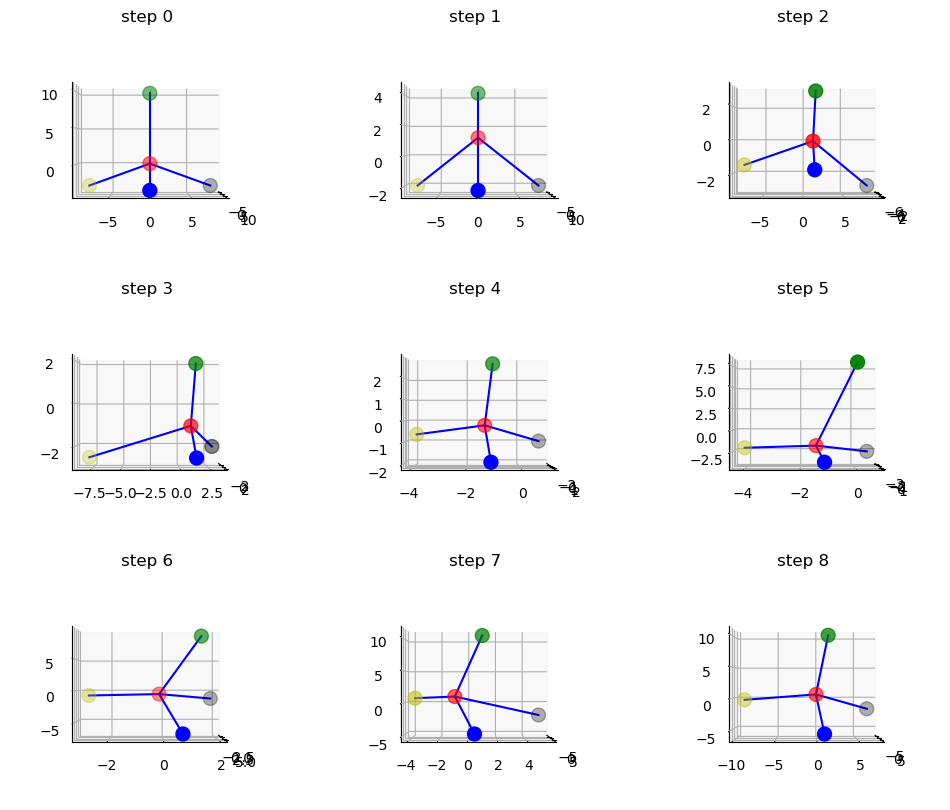

In [12]:
fig = plt.figure(figsize=(12,10))
# plt.title("illustrating the sample sequence")
plt.axis("off")
ax = fig.add_subplot(3,3,1,projection="3d")
ax.set_title("step 0")
r= r0

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)



ax = fig.add_subplot(3,3,2,projection="3d")
ax.set_title("step 1")
r= rf1

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)


ax = fig.add_subplot(3,3,3,projection="3d")
ax.set_title("step 2")
r= rf2

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)

ax = fig.add_subplot(3,3,4,projection="3d")
ax.set_title("step 3")
r= rf3

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)

ax = fig.add_subplot(3,3,5,projection="3d")
ax.set_title("step 4")
r= rf4

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)

ax = fig.add_subplot(3,3,6,projection="3d")
ax.set_title("step 5")
r= rf5

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)

ax = fig.add_subplot(3,3,7,projection="3d")
ax.set_title("step 6")
r= rf6

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)



ax = fig.add_subplot(3,3,8,projection="3d")
ax.set_title("step 7")
r= rf7

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)


ax = fig.add_subplot(3,3,9,projection="3d")
ax.set_title("step 8")
r= rf8

ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")
ax.view_init(0,0)



plt.savefig("2_1.png")
plt.show()


AttributeError: 'Axes3D' object has no attribute 'show'

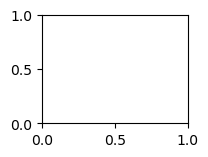

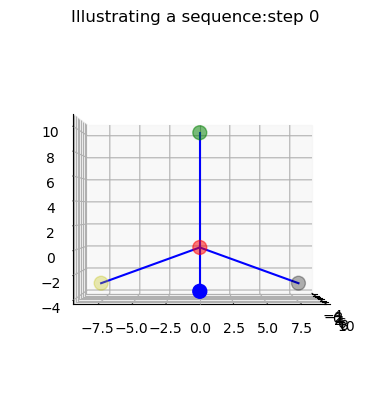

In [13]:
plt.subplot(3,3,1)

p1 = visualize(r0)
plt.title("Illustrating a sequence:step 0")
plt.savefig("step0.png")
p1.show()

plt.subplot(3,3,2)

p1 = visualize(rf1)
plt.title("Illustrating a sequence:step 1")
plt.savefig("step0.png")

plt.subplot(3,3,3)

p2 = visualize(rf2)
plt.title("Illustrating a sequence:step 2")
plt.savefig("step1.png")

plt.subplot(3,3,4)

p3 = visualize(rf3)
plt.title("Illustrating a sequence:step 3")
plt.savefig("step2.png")

plt.subplot(3,3,5)

p4 = visualize(rf4)
plt.title("Illustrating a sequence:step 4")
plt.savefig("step3.png")

plt.subplot(3,3,6)

p5 = visualize(rf5)
plt.title("Illustrating a sequence:step 5")
plt.savefig("step4.png")

plt.subplot(3,3,7)


p6 = visualize(rf6)
plt.title("Illustrating a sequence:step 6")
plt.savefig("step5.png")

plt.subplot(3,3,8)

p6 = visualize(rf7)
plt.title("Illustrating a sequence:step 7")
plt.savefig("step5.png")

plt.subplot(3,3,9)

p6 = visualize(rf8)
plt.title("Illustrating a sequence:step 8")
plt.savefig("step5.png")

plt.show()


## Rotor

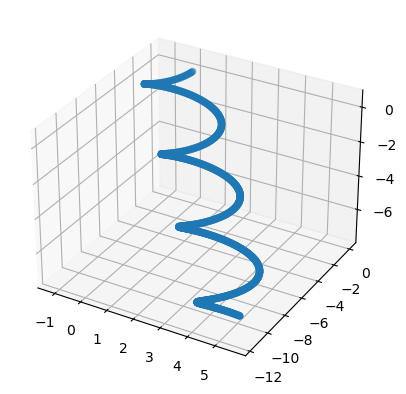

In [ ]:
_,_,_,_,_,ax = getCircleSteps(10,3,1000)

In [ ]:
#plt.title("Illustrating repeating a sequence with a=10, R=1, eps=3 for 1000 times")
plt.show(ax)

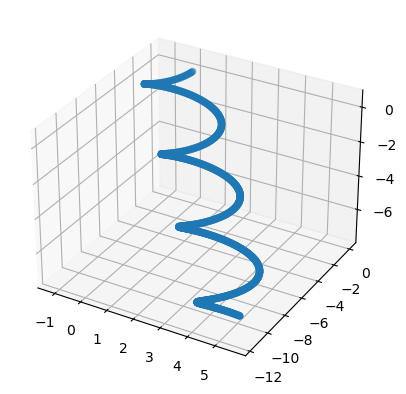

<Figure size 640x480 with 0 Axes>

In [ ]:

_,_,_,_,_,ax =  getCircleSteps(10,3,1000)
plt.savefig("2_2.png")



In [17]:
def getCircleSteps2(a,epsilon,rotorStep):
    # epsilon = 3
    R = 1 
    closing  = a - np.arange(steps+1)*epsilon/steps
    opening = a - epsilon + np.arange(steps+1)*epsilon/steps
    opened = a *np.ones(steps+1)
    closed = (a-epsilon)*np.ones(steps+1)

    totalRotation = np.eye(3)
    totalDelta = 0
    
    rf1,delta,Rotation=  act(np.array([closing,opened,opened,opened]),R)
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf2,delta,Rotation=  act(np.array([closed,closing,opened,opened]),R)
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf3,delta,Rotation=  act(np.array([closed,closed,closing,opened]),R)
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf4,delta,Rotation=  act(np.array([closed,closed,closed,closing]),R)
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf5,delta,Rotation=  act(np.array([opening,closed,closed,closed]),R)
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf6,delta,Rotation=  act(np.array([opened,opening,closed,closed]),R)
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf7,delta,Rotation=  act(np.array([opened,opened,opening,closed]),R)
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)

    rf8,delta,Rotation=  act(np.array([opened,opened,opened,opening]),R)
    totalDelta += np.matmul(totalRotation,delta)
    totalRotation  = np.matmul(Rotation,totalRotation)
    
    
    
    
    
    
    
    
    
    #rotorStep = 1000
    rotorR = np.array([0.,0.,0.])
    rotorRotation = np.eye(3)

    poses = np.zeros((rotorStep,3))
    for i in range(rotorStep):
        rotorR += np.matmul(rotorRotation,totalDelta)
        rotorRotation = np.matmul(totalRotation,rotorRotation)
        poses[i,:] = rotorR
        
        
    # ax = plt.figure().add_subplot(projection='3d')

    # ax.scatter(xs = poses[:,0],ys = poses[:,1], zs=poses[:,2])
    # plt.show()
        
        
    deltaSpringPerStep = (poses[-1]-poses[0])/rotorStep
    
    # plt.scatter(poses[:,0],poses[:,1])
    # plt.show()
    
    ys= poses[:,1] 
    maxes = np.logical_and((ys >= np.roll(ys,1)),(ys >= np.roll(ys,-1)))
    a1 = list(maxes).index(True,1)
    a2 = list(maxes).index(True,a1+1)

    circlingSteps = a2 -a1
    rotorR = np.array([0.,0.,0.])
    rotorRotation = np.eye(3)

    OneCirclePoses = np.zeros((circlingSteps,3))
    for i in range(circlingSteps):
        rotorR += np.matmul(rotorRotation,totalDelta)
        rotorRotation = np.matmul(totalRotation,rotorRotation)
        OneCirclePoses[i,:] = rotorR
    
    # plt.scatter(poses[:,0],poses[:,1])
    # plt.show()

    image = OneCirclePoses - ((OneCirclePoses[-1]-OneCirclePoses[0])/circlingSteps)*np.arange(circlingSteps).reshape((circlingSteps,1))
    meanPoing = np.mean(image,axis=0)

    # ax = plt.figure().add_subplot(projection='3d')
    # ax.scatter(xs = image[:,0],ys = image[:,1], zs=image[:,2])
    # ax.scatter(np.mean(image[:,0]),np.mean(image[:,1]),np.mean(image[:,2]))
    # ax.scatter(meanPoing[0],meanPoing[1],meanPoing[2])
    
    # plt.show()

   
    return *deltaSpringPerStep,circlingSteps,np.mean(np.linalg.norm(image - meanPoing,axis=1))



In [18]:
getCircleSteps2(As[0],Eps[0]*As[0],10000)

NameError: name 'As' is not defined

In [19]:
RotorAandEpsData = np.zeros((20,20,5))
As = [a for a in range(10, 30)]
Eps = [eps for eps in np.arange(20,40,1)/80]

for i in range(20):
    for j in range(20):
        print(i,j)
        RotorAandEpsData[i,j] = getCircleSteps2(As[i],Eps[j]*As[i],10000)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10

In [21]:
ylables = ["delta x","delta y","delta z", "circling Steps", "rho","displacement","pitch"]

In [25]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [22]:
displacement = np.linalg.norm(RotorAandEpsData[:,:,:3],axis=2)

In [23]:
pitch =  displacement * RotorAandEpsData[:,:,3] 

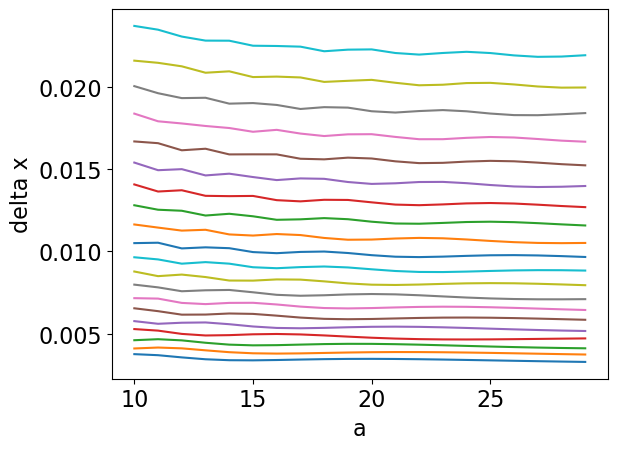

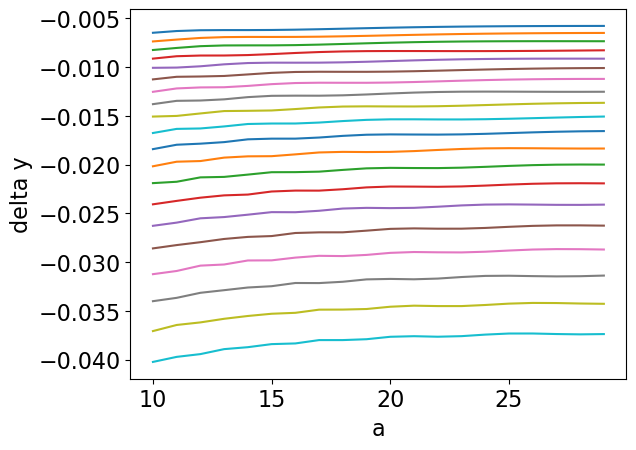

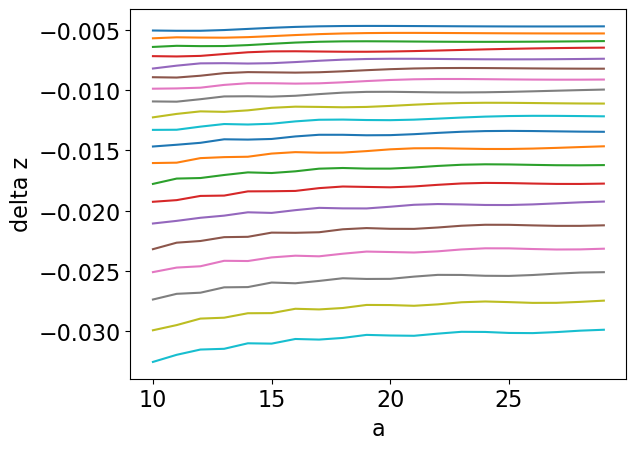

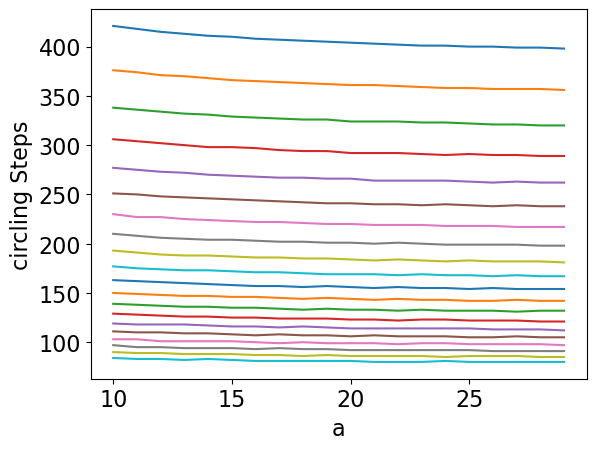

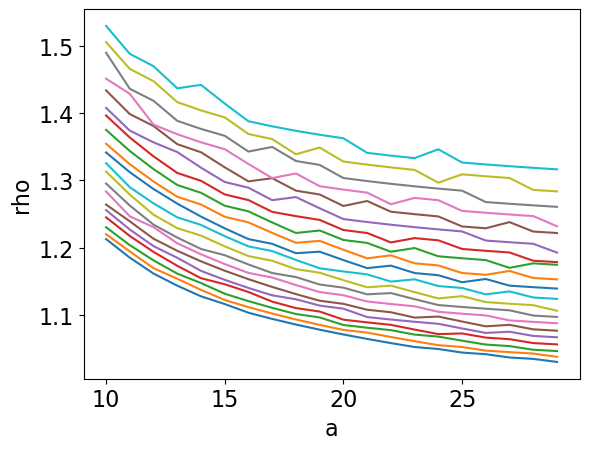

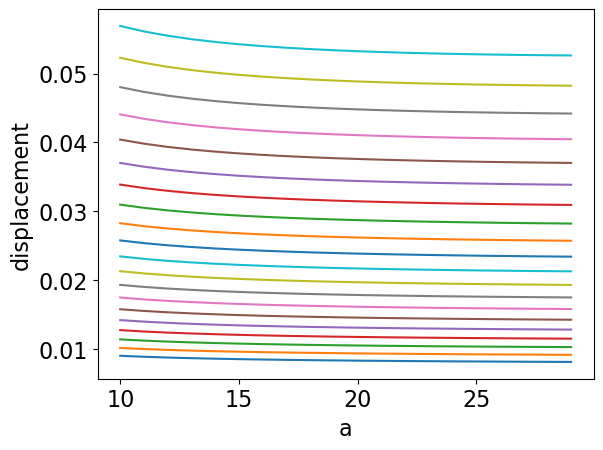

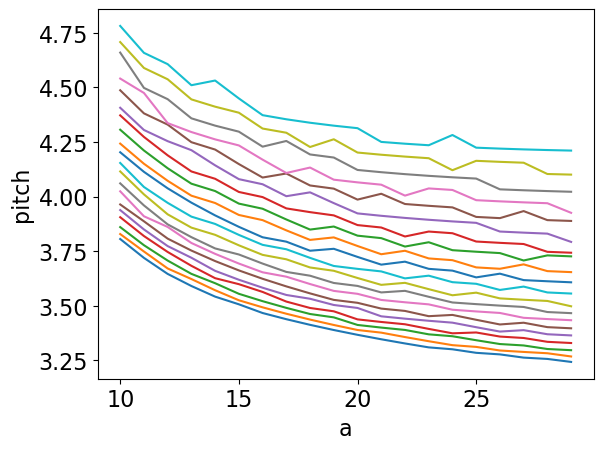

-0.08152432918283661


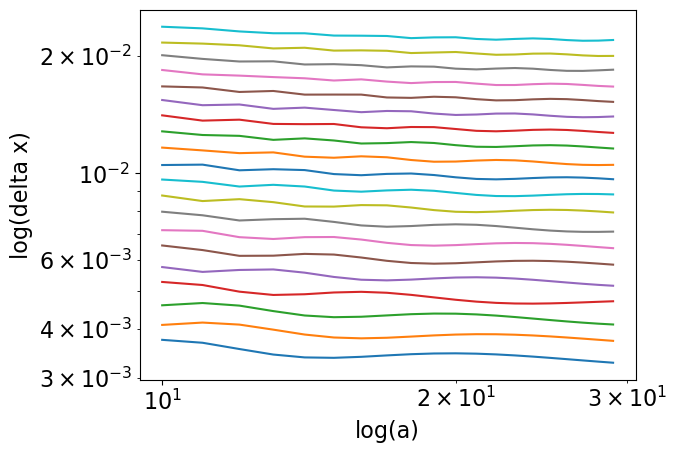

-0.0859075631946155


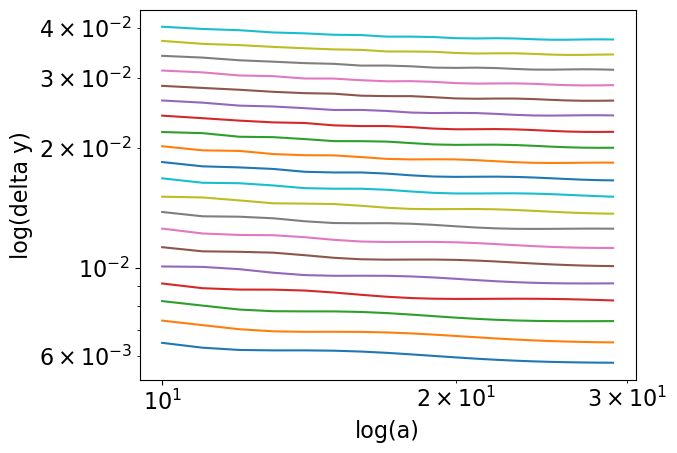

-0.08017743357531545


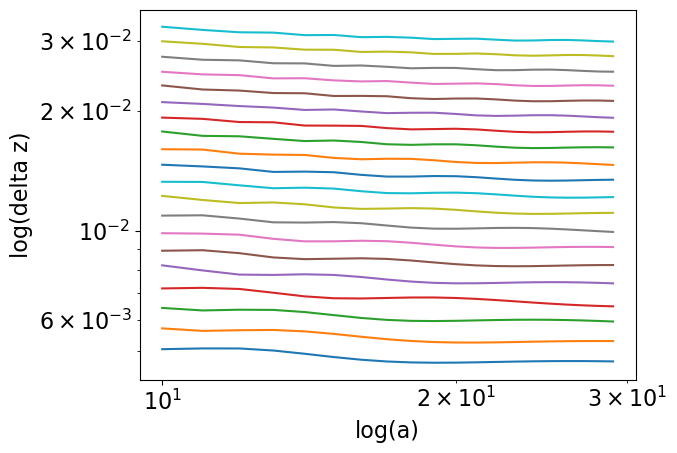

-0.05076408822391718


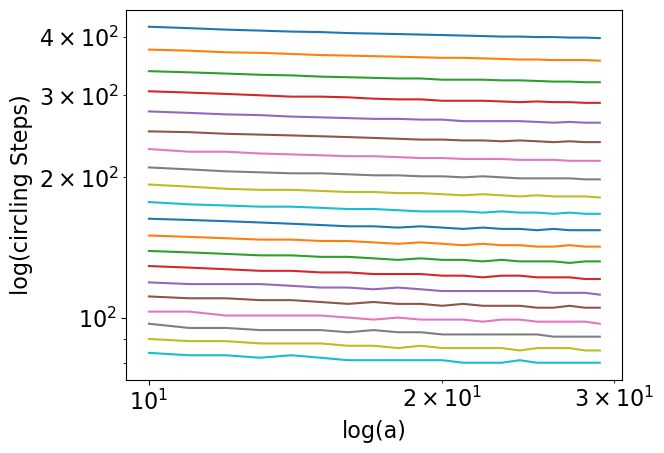

-0.1447691598824062


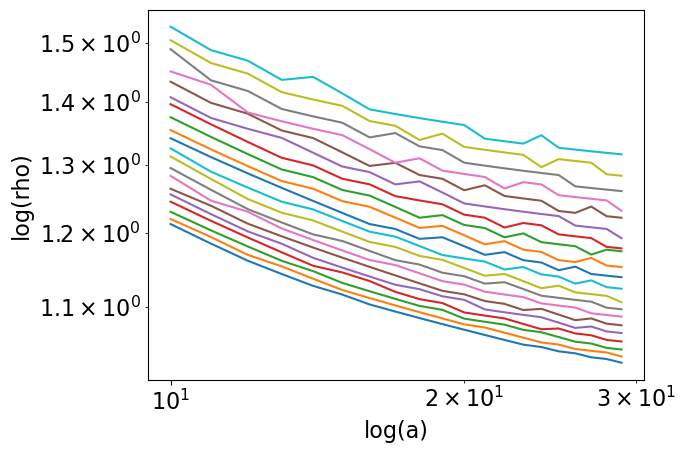

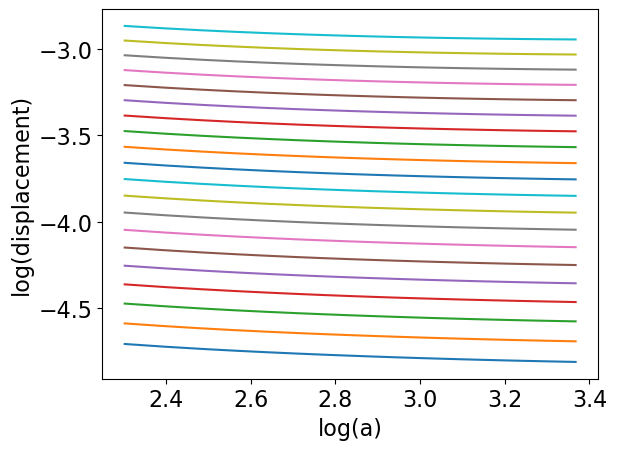

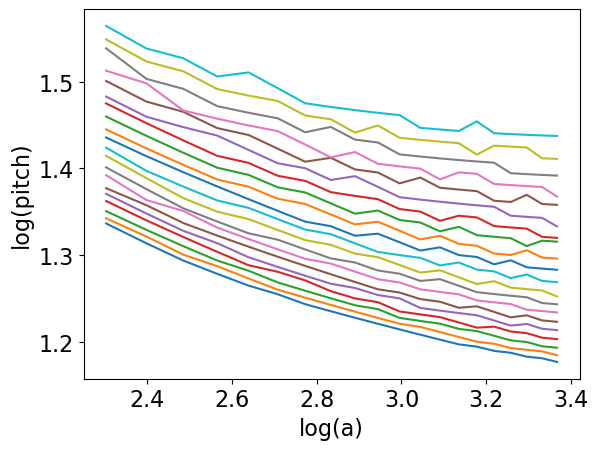

In [41]:
for j in range(5):
    for i in range(20):
        plt.plot(As,RotorAandEpsData[:,i,j])
    plt.xlabel("a")
    plt.ylabel(ylables[j])


    plt.savefig("2_" + str(j+3) +".png", bbox_inches="tight")
        
    plt.show()


for i in range(20):
    plt.plot(As,displacement[:,i])

plt.xlabel("a")
plt.ylabel(ylables[5])

plt.savefig("2_8.png", bbox_inches="tight")

plt.show()

for i in range(20):
    plt.plot(As,pitch[:,i])

plt.xlabel("a")
plt.ylabel(ylables[6])

plt.savefig("2_9.png", bbox_inches="tight")

plt.show()



for j in range(5):
    slopes = 0
    for i in range(20):
        plt.loglog(As,np.abs(RotorAandEpsData[:,i,j]))
        slope,_,_,_,_= scipy.stats.linregress(np.log(As),np.log(np.abs(RotorAandEpsData[:,i,j])))
        slopes += slope
    print(slopes/20)



    plt.xlabel("log(a)")
    plt.ylabel("log(" + ylables[j] + ")")


    plt.savefig("2_" + str(j+10) +".png", bbox_inches="tight")
    plt.show()




for i in range(20):
    plt.plot(np.log(As),np.log(displacement[:,i]))

plt.xlabel("log(a)")
plt.ylabel("log("+str(ylables[5])+")")

plt.savefig("2_15.png", bbox_inches="tight")

plt.show()

for i in range(20):
    plt.plot(np.log(As),np.log(pitch[:,i]))

plt.xlabel("log(a)")
plt.ylabel("log("+str(ylables[6])+")")

plt.savefig("2_16.png", bbox_inches="tight")

plt.show()


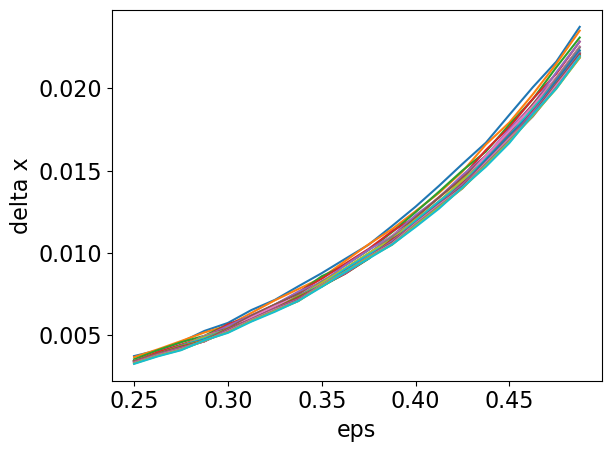

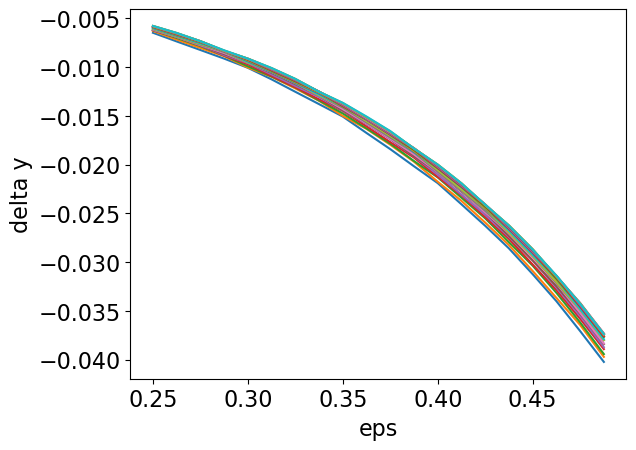

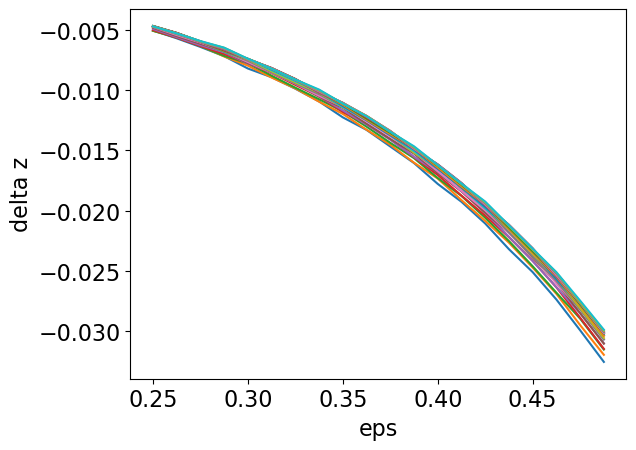

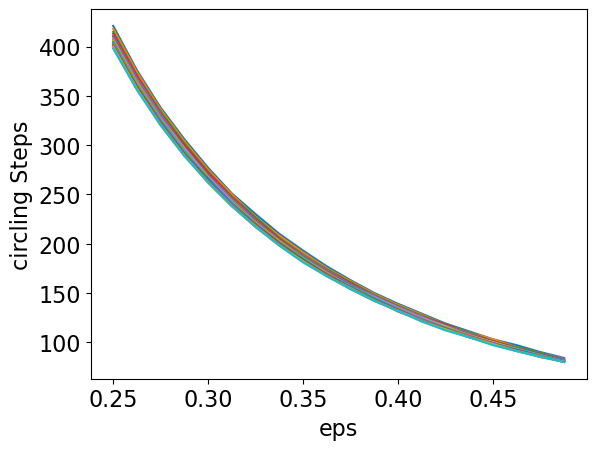

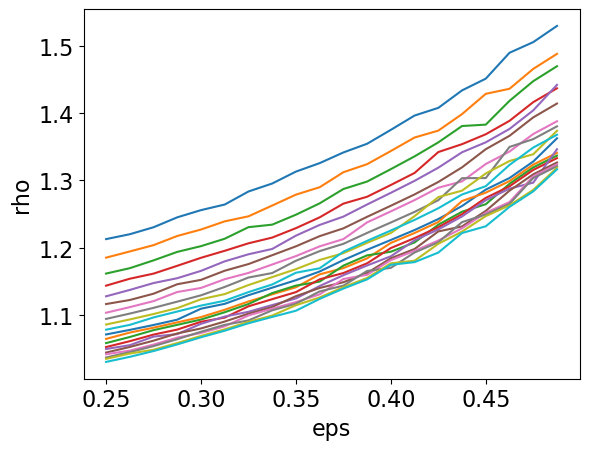

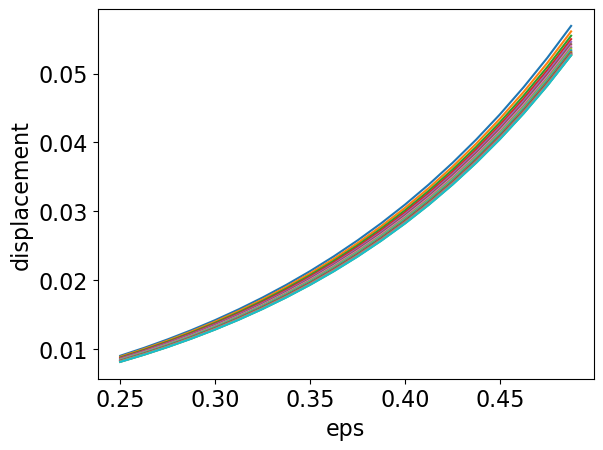

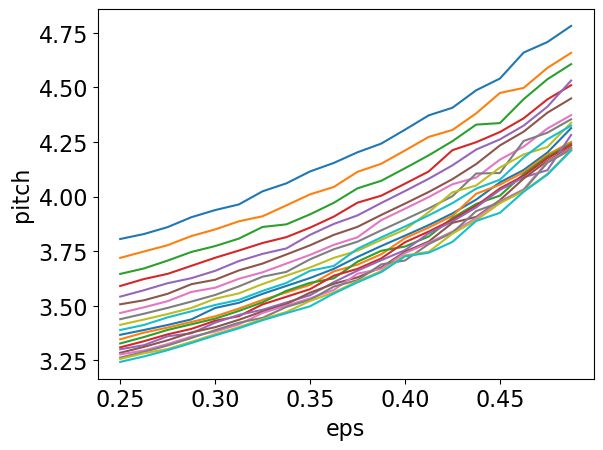

2.8056976570756653


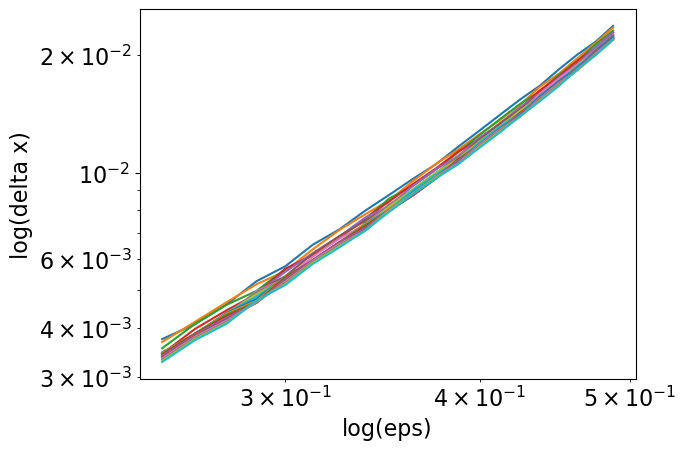

2.760115426128537


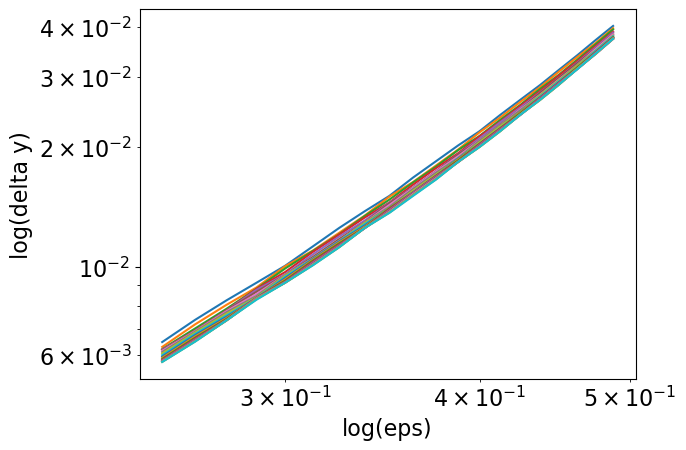

2.7718386697735142


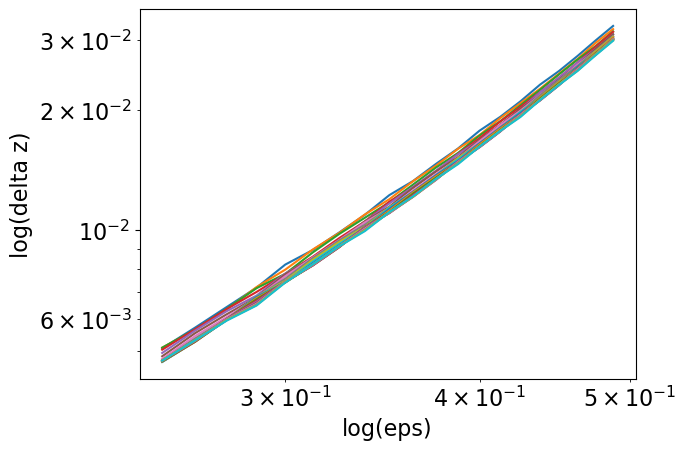

-2.4121463612124736


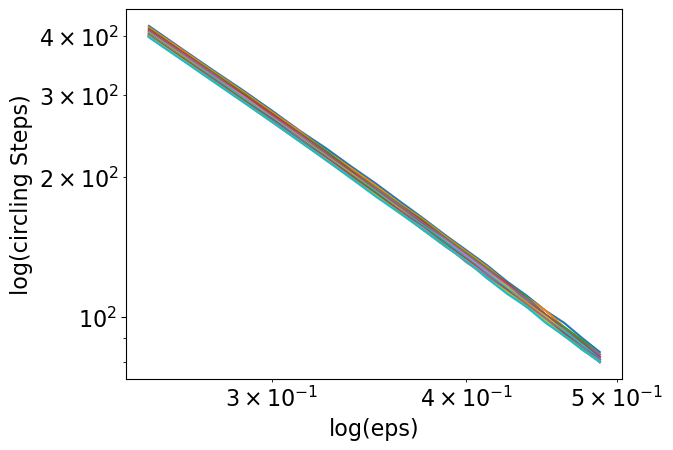

0.34995009746877753


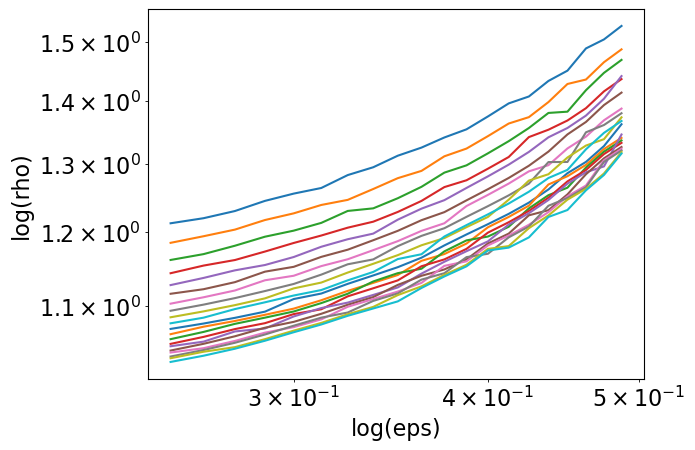

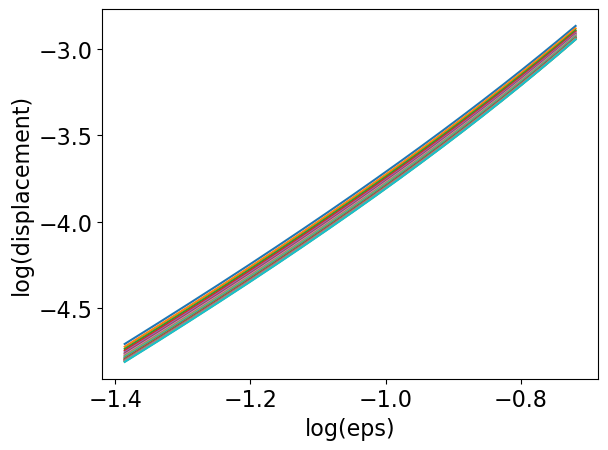

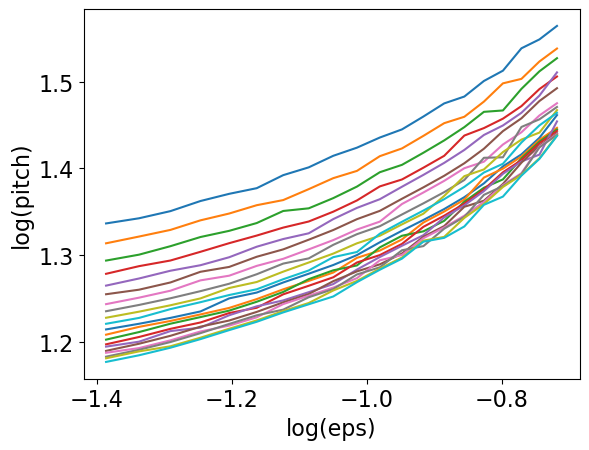

In [42]:
plt.Figure(figsize=(20,20))
plt.subplots(tight_layout=True)
for j in range(5):
    for i in range(20):
        plt.plot(Eps,RotorAandEpsData[i,:,j])




    plt.xlabel("eps")
    plt.ylabel(ylables[j])

    plt.savefig("2_" + str(j+17) +".png", bbox_inches="tight")
    plt.show()


for i in range(20):
    plt.plot(Eps,displacement[i,:])

plt.xlabel("eps")
plt.ylabel(ylables[5])
plt.savefig("2_22.png", bbox_inches="tight")

plt.show()

for i in range(20):
    plt.plot(Eps,pitch[i,:])



plt.xlabel("eps")
plt.ylabel(ylables[6])
plt.savefig("2_23.png", bbox_inches="tight")
plt.show()


for j in range(5):
    slopes = 0

    plt.xlabel("log(eps)")
    plt.ylabel("log(" + ylables[j] + ")")
    for i in range(20):
        plt.loglog(Eps,np.abs(RotorAandEpsData[i,:,j]))
        slope,_,_,_,_= scipy.stats.linregress(np.log(Eps),np.log(np.abs(RotorAandEpsData[i,:,j])))
        slopes += slope
    print(slopes/20)





    plt.savefig("2_" + str(j+24) +".png", bbox_inches="tight")
    plt.show()



for i in range(20):
    plt.plot(np.log(Eps),np.log(displacement[i,:]))

plt.xlabel("log(eps)")
plt.ylabel("log(" + ylables[5] + ")")
plt.savefig("2_29.png", bbox_inches="tight")

plt.show()

for i in range(20):
    plt.plot(np.log(Eps),np.log(pitch[i,:]))



plt.xlabel("log(eps)")
plt.ylabel("log(" + ylables[6] + ")")
plt.savefig("2_30.png", bbox_inches="tight")
plt.show()


In [13]:
import scipy 

In [14]:
scipy.stats.linregress()

<function scipy.stats._stats_mstats_common.linregress(x, y=None, alternative='two-sided')>

In [35]:
%matplotlib inline